## Comparing sophronia data processed with LSC settings vs no thresholds

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from pathlib import Path
import os
import re
import sys
sys.path.append('/home/e78368jw/Documents/NEXT_CODE/next_misc/cluster_analysis_code/HE_calibration')
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

from invisible_cities.io.dst_io        import df_writer
from invisible_cities.io.dst_io        import load_dst

from invisible_cities.cities.beersheba import cut_over_Q
from invisible_cities.cities.beersheba import drop_isolated 


In [5]:
def raw_plotter(q, evt, pitch = 15.55):
    '''
    just plots the hits, nothing smart
    '''

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    xx = np.arange(q.X.min(), q.X.max() + pitch, pitch)
    yy = np.arange(q.Y.min(), q.Y.max() + pitch, pitch)
    zz = np.sort(q.Z.unique())

    axes[0].hist2d(q.X, q.Y, bins=[xx, yy], weights=q.Q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(q.X, q.Z, bins=[xx, zz], weights=q.Q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(q.Y, q.Z, bins=[yy, zz], weights=q.Q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');
    fig.suptitle("rebinned in Z")
    plt.show(fig)



In [6]:
low_thr_files = glob('low_thr/*000[0-9]*')
low_thr_files  = sorted(low_thr_files, key=lambda f: int(re.search(r'_000(\d)_', f).group(1)))

lsc_run_files = glob('lsc_run/*000[0-9]*')
lsc_run_files = sorted(lsc_run_files, key=lambda f: int(re.search(r'_000(\d)_', f).group(1)))

print(low_thr_files)
print(lsc_run_files)


['low_thr/run_15281_0000_ldc1.h5', 'low_thr/run_15281_0001_ldc1.h5', 'low_thr/run_15281_0002_ldc1.h5', 'low_thr/run_15281_0003_ldc1.h5', 'low_thr/run_15281_0004_ldc1.h5', 'low_thr/run_15281_0005_ldc1.h5', 'low_thr/run_15281_0006_ldc1.h5', 'low_thr/run_15281_0007_ldc1.h5', 'low_thr/run_15281_0008_ldc1.h5', 'low_thr/run_15281_0009_ldc1.h5']
['lsc_run/run_15281_0000_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0001_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0002_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0003_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0004_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0005_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0006_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0007_ldc1_trg2.v2.3.1.20250429.HEDesman.sophronia.h5', 'lsc_run/run_15281_0008_ldc1_trg2.v2.3.1.20250429.HEDesman.sophron

# find event with energy in ROI

evt 9: 2.388865595046239.MeV


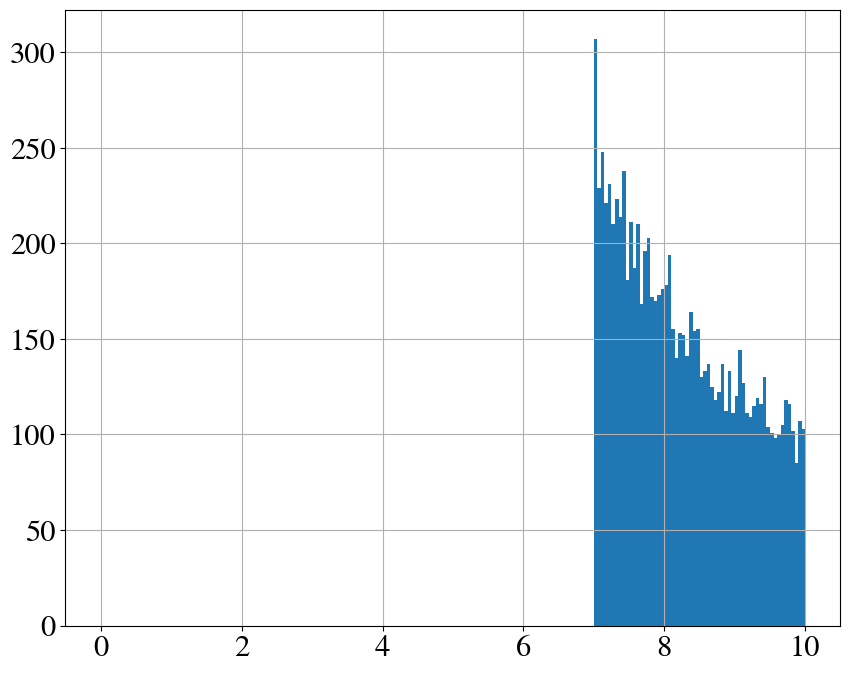

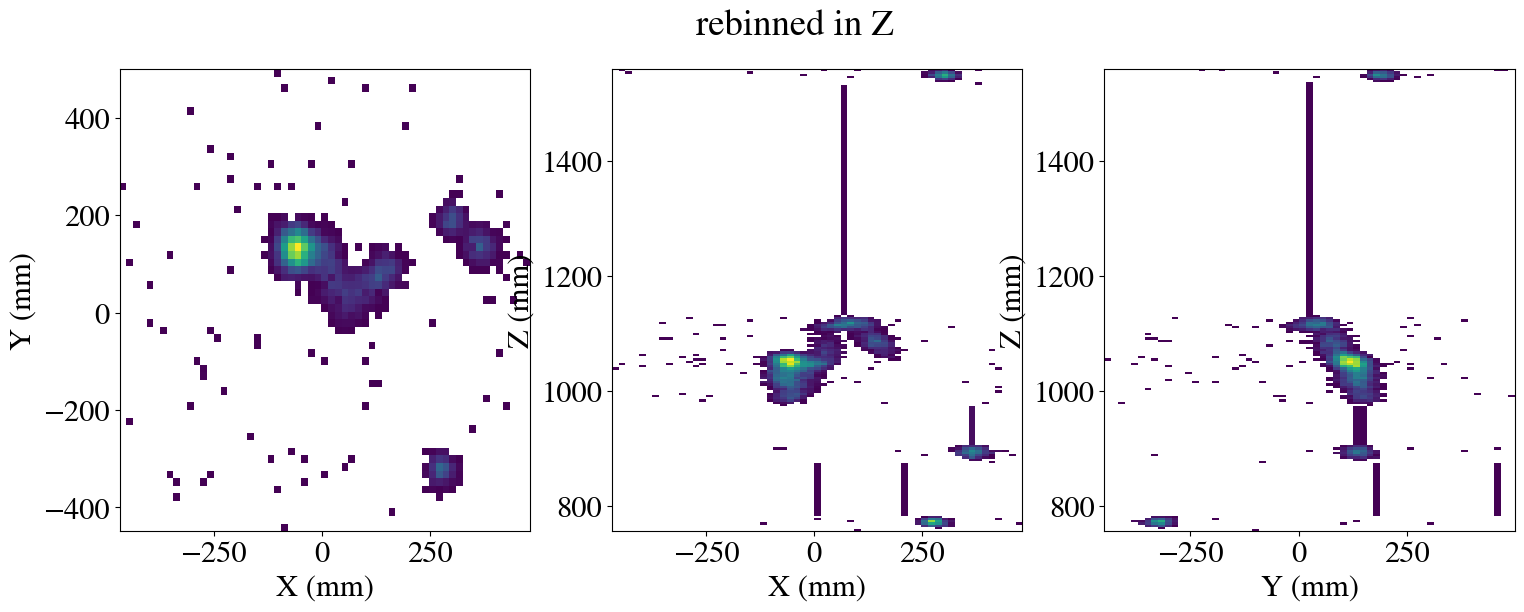

In [15]:
evt_energies = []
for lsc_file, thr_file in zip(lsc_run_files, low_thr_files):

    df = load_dst(lsc_file, 'RECO', 'Events')
    df.Q.hist(bins = 200, range = [0,10])
    for evt, df_evt in df.groupby('event'):
        print(f'evt {evt}: {df_evt.Ec.sum()}.MeV')
        evt_energies.append(df_evt.Ec.sum())
        raw_plotter(df_evt, evt)
        break
    break

Did it more or less by eye, list of events to follow.
Plan is to have each event plotted with cut_over_Q of 5 PES to show the comparison.

** we have to use 7 PES because they did in this processing ...

In [22]:
from tqdm import tqdm

In [23]:
# define cut_over_Q and drop_isolated object
q_thr     = 7
drop_dist = [15.55, 15.55]

cut_sensors   = cut_over_Q(q_thr, ['E', 'Ec'])
drop_sensors  = (drop_dist, ['E', 'Ec'])

# list of evts
evts = [177, 219, 737, 842, 849, 954, 1045, 1087, 1094]

# generate folders to store data
for evt in evts:
    Path(f'evt{evt}_images').mkdir(parents=True, exist_ok=True)

lsc_EOI = []
thr_EOI = []
for lsc_file, thr_file in tqdm(zip(lsc_run_files, low_thr_files)):

    df_lsc = load_dst(lsc_file, 'RECO', 'Events')
    df_thr = load_dst(thr_file, 'RECO', 'Events')
    # extract the events of interest from the df
    df_lsc = df_lsc[df_lsc.event.isin(evts)]
    df_thr = df_thr[df_thr.event.isin(evts)]
    # cut and drop
    df_lsc  = cut_sensors(df_lsc.copy())
    df_thr  = cut_sensors(df_thr.copy())

    df_lsc  = drop_sensors(df_lsc.copy())
    df_thr  = drop_sensors(df_thr.copy())

    lsc_EOI.append(df_lsc)
    thr_EOI.append(df_thr)



0it [00:00, ?it/s]

: 

(array([ 4., 14., 21., 29., 31., 23., 19., 14., 16., 17., 18., 11.,  7.,
        11., 12., 10.,  8.,  8., 13.,  9.,  9.,  8.,  4.,  5.,  3.,  7.,
         2.,  0.,  3.,  0.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.25707582, 0.35451732, 0.45195881, 0.54940031, 0.64684181,
        0.74428331, 0.84172481, 0.93916631, 1.03660781, 1.1340493 ,
        1.2314908 , 1.3289323 , 1.4263738 , 1.5238153 , 1.6212568 ,
        1.7186983 , 1.81613979, 1.91358129, 2.01102279, 2.10846429,
        2.20590579, 2.30334729, 2.40078879, 2.49823029, 2.59567178,
        2.69311328, 2.79055478, 2.88799628, 2.98543778, 3.08287928,
        3.18032078, 3.27776227, 3.37520377, 3.47264527, 3.57008677,
        3.66752827, 3.76496977, 3.86241127, 3.95985277, 4.05729426,
        4.15473576, 4.25217726, 4.34961876, 4.44706026, 4.54450176,
        4.64194326, 4.73938475, 4.83682625, 4.93426775, 5.03170925,
        5.12915075]),
 <BarContainer

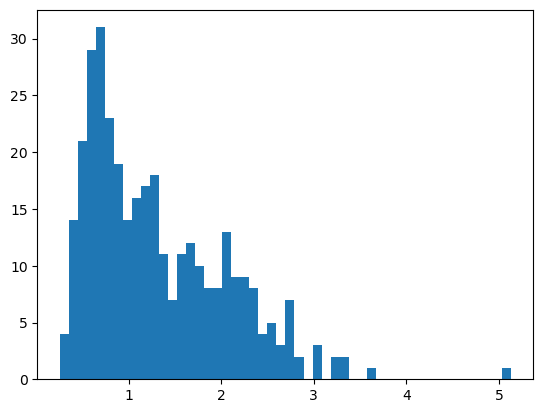